In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader

In [2]:
#Simple Dataset class for our change detection dataset

class ChangeDetectionDataset(Dataset):
    def __init__(self, csv_file="data.csv", data_dir="./data", transform=None):
        self.data = pd.read_csv(csv_file)
        self.data_dir = data_dir
        self.transform = transform
    def __len__(self):
        return len(self.data)

    def random_crop(self, img1, img2, cm, size):
        x = np.random.randint(0, img1.shape[2]-size)
        y = np.random.randint(0, img1.shape[1]-size)
        img1 = img1[:,y:y+size, x:x+size]
        img2 = img2[:,y:y+size, x:x+size]
        cm = cm[:, y:y+size, x:x+size]
        return img1, img2, cm

    def __getitem__(self, idx):
        img1 = read_image(self.data_dir+'/'+self.data.iloc[idx,0])
        img2 = read_image(self.data_dir+'/'+self.data.iloc[idx,1])
        cm = read_image(self.data_dir+'/'+self.data.iloc[idx,2])
        #apply the same transformation to all images as batch dimension
        print(self.data.iloc[idx,1])
        return self.random_crop(img1,img2,cm,128)            
        

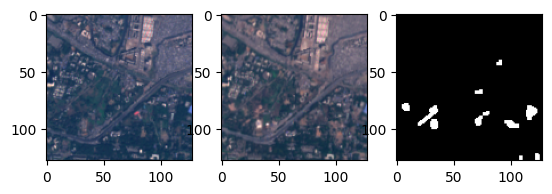

In [77]:
#Simple DataLoader class for our change detection dataset
dataset= ChangeDetectionDataset(transform=None)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

#Simple function to display a batch of images

def show_batch(batch):
    img1s, img2s, cms = batch

    for i in range(len(img1s)):
        img1 = img1s[i]
        img2 = img2s[i]
        cm = cms[i]
        fig, ax = plt.subplots(1,3)
        ax[0].imshow(img1.permute(1,2,0))
        ax[1].imshow(img2.permute(1,2,0))
        ax[2].imshow(cm.permute(1,2,0), cmap='gray')
        plt.show()

#Display a batch of images
a = next(iter(dataloader))
show_batch(a)